## 행렬의 곱

- (*) 연산자: 행렬끼리의 곱을 할 수 있다. -> shape

In [ ]:
import numpy as np

In [ ]:
a = np.array(
    [[1, 2],
     [3, 4]])
b = np.array(
    [[1, 2],
     [3, 4]])

print(a * b) # dot or @

# https://seong6496.tistory.com/110

# DataFrame 데이터 프레임

- 2차원 배열

- 표, 테이블 형태

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    '연차': [1, 2, 3],
    '연도': [2015, 2016, 2017],
    '매출': [10000, 20000, 30000]
})

print(df)
print(df)

   연차    연도     매출
0   1  2015  10000
1   2  2016  20000
2   3  2017  30000


RangeIndex(start=0, stop=3, step=1)

In [ ]:
df.set_index('연도', inplace=True)  # set_index -> 특정 값을 인덱스로 지정

,연차,매출
연도,,
2015,1,10000
2016,2,20000
2017,3,30000


## DataFrame의 Column(컬럼, 열)

In [ ]:
df.columns  # 어떤 값들이 있는지 확인 가능

Index(['연차', '매출'], dtype='object')

In [ ]:
df['매출']

연도
2015    10000
2016    20000
2017    30000
Name: 매출, dtype: int64

## DataFrame의 Data(데이터)

데이터 조회

In [ ]:
df.loc[2016]  # 행 데이터를 가져옴. 레이블(인덱스)로 불러야함
              # 2016의 값을 가져온다

연차        2
매출    20000
Name: 2016, dtype: int64

In [ ]:
# 2016, 2017년 레이블을 이용해서 값을 가져오기
df.loc[2016:2017]

In [ ]:
df.loc[2016, '매출']  # (원하는 레이블의, 원하는 열)

In [ ]:
df.iloc[1]

연차        2
매출    20000
Name: 2016, dtype: int64

In [ ]:
# 2016, 2017 슬라이싱으로 iloc 이용하기
df.iloc[1:3]

## 데이터 불러오고 살펴보기

In [ ]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
data.describe()

In [ ]:
data.head()  # 5개의 상위 데이터를 보여줌

In [ ]:
data.tail()  # 5개의 하위 데이터

In [ ]:
data.index

RangeIndex(start=0, stop=3000, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


### 데이터 불러오고 할일

- read_csv(): 데이터를 불러옴
- head(): 상위 값 확인(위치)
- tail(): 하위 값 확인
- describe(): 기초 통계 내용
- index: 인덱스가 어떤걸로 되어 있는 지
- info(): col값, null값이 있는 지, 데이터 타입(컬럼 별)

## 데이터 기초 통계 직접 적용해보기
- 데이터 타입 변환: households, population,
housing_median_age, total_rooms, total_bedrooms, median_house_value
- 통계 함수 적용

In [ ]:
# 각각의 값의 데이터 타입을 바꾸기  따로 저장해야됨
data_int = data.astype({'households':'int', 
           'population':'int',
           'housing_median_age':'int',
           'total_rooms':'int',
           'total_bedrooms':'int',
           'median_house_value':'int'})
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   int64  
 3   total_rooms         3000 non-null   int64  
 4   total_bedrooms      3000 non-null   int64  
 5   population          3000 non-null   int64  
 6   households          3000 non-null   int64  
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 211.1 KB


In [ ]:
total_rooms_mean = data['total_rooms'].mean()   # dataframe['column'].함수()
print(total_rooms_mean)

2599.58


In [ ]:
total_rooms_median = data['total_rooms'].median()
print(total_rooms_median)

2106.0


In [ ]:
total_rooms_std = data['total_rooms'].std()
print(total_rooms_std)

2155.593331625581


In [ ]:
type(total_rooms_mean)

numpy.float64

In [ ]:
data['longitude'].unique()  # 값들 중 유일한 값을 찾아줌  -> 리턴값: numpy 배열

In [ ]:
data['longitude'].value_counts()  # 속성값의 빈도수

-118.21    26
-118.26    26
-118.29    25
-118.28    25
-118.27    25
           ..
-120.33     1
-119.00     1
-119.08     1
-114.61     1
-119.86     1
Name: longitude, Length: 607, dtype: int64

In [ ]:
data['longitude']  # type: 시리즈

0      -122.05
1      -118.30
2      -117.81
3      -118.36
4      -119.67
         ...  
2995   -119.86
2996   -118.14
2997   -119.70
2998   -117.12
2999   -119.63
Name: longitude, Length: 3000, dtype: float64

### groupby
- 데이터를 그룹별로 분할

**단계**

- 1. split: 원본 데이터에서 분류하고자하는 데이터를 나눠준다.
- 2. apply: 분류된 데이터(그룹별)에 함수를 적용
- 3. combine: 함수 적용된 데이터를 다시 합쳐줌

In [ ]:
data_int.groupby('total_rooms').mean()  # total_rooms 를 기준으로 정렬?

In [ ]:
df = pd.DataFrame({
    '연차': [1, 2, 3],
    '연도': [2015, 2016, 2017],
    '매출': [10000, 20000, 30000]
})

df

,연차,연도,매출
0,1,2015,10000
1,2,2016,20000
2,3,2017,30000


In [ ]:
df.groupby('연도')['매출'].mean() # groupby  연도를 인덱스로 하여 연도별로 매출의 평균

연도
2015    25000.0
2016    20000.0
2017    30000.0
Name: 매출, dtype: float64

In [ ]:
date_df = pd.DataFrame({'Data':[
    '2023-01-01 11:25:00',
    '2023-01-01 11:25:00',
    '2023-01-01 11:25:00',
    ]})

In [ ]:
df['Date']=date_df
df

,연차,연도,매출,Date
0,1,2015,10000,2023-01-01 11:25:00
1,2,2016,20000,2023-01-01 11:25:00
2,3,2017,30000,2023-01-01 11:25:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연차      3 non-null      int64 
 1   연도      3 non-null      int64 
 2   매출      3 non-null      int64 
 3   Date    3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연차      3 non-null      int64         
 1   연도      3 non-null      int64         
 2   매출      3 non-null      int64         
 3   Date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 224.0 bytes


In [ ]:
df['Date'].dt.date  # 년, 월, 일
df['Date'].dt.year  # 년
df['Date'].dt.month  # 월
df['Date'].dt.day  # 일

0    2023-01-01
1    2023-01-01
2    2023-01-01
Name: Date, dtype: object

In [ ]:
df['Date'].dt.time  # 시간
df['Date'].dt.hour  # 시
df['Date'].dt.minute # 분
df['Date'].dt.second  # 초

0    11:25:00
1    11:25:00
2    11:25:00
Name: Date, dtype: object

### Groupby

- 기준: 범주형 데이터(성별, 지역, 혈액형, 국적, 학년 등)
- 파악할 데이터: 수치형 데이터

In [ ]:
data = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울', '제주', '제주', '부산', '부산', '제주'],
    '연도': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    '전입신고 수': [10040, 22300, 6000, 12400, 4000, 600, 11100, 45000, 31000],
    '세금': [1004000, 2230000, 600000, 1240000, 400000, 60000, 1110000, 4500000, 3100000]
})
data

,도시,연도,전입신고 수,세금
0,서울,2015,10040,1004000
1,부산,2016,22300,2230000
2,제주,2017,6000,600000
3,서울,2018,12400,1240000
4,제주,2019,4000,400000
5,제주,2020,600,60000
6,부산,2021,11100,1110000
7,부산,2022,45000,4500000
8,제주,2023,31000,3100000


In [ ]:
data.groupby('도시')['전입신고 수'].sum()  # groupby -> 도시를 인덱스로 하고 전입신고 수의 합계를 구함

# data.groupby(행에 들어갈)[열에 들어갈].sum()  ?

도시
부산    78400
서울    22440
제주    41600
Name: 전입신고 수, dtype: int64

In [ ]:
# 도시 별 전입신고 수의 평균
data.groupby('도시')['전입신고 수'].mean()  # 데이터프레임에 인덱싱을 한다 -> 시리즈 타입으로 출력?

도시
부산    26133.333333
서울    11220.000000
제주    10400.000000
Name: 전입신고 수, dtype: float64

In [ ]:
# 도시와 연도를 기준으로? 평균 구하기
data.groupby(['도시', '연도']).mean()  # 인덱싱을 안한다 -> 데이터 프레임 타입으로 출력

전입신고 수         세금
도시 연도                      
부산 2016  22300.0  2230000.0
   2021  11100.0  1110000.0
   2022  45000.0  4500000.0
서울 2015  10040.0  1004000.0
   2018  12400.0  1240000.0
제주 2017   6000.0   600000.0
   2019   4000.0   400000.0
   2020    600.0    60000.0
   2023  31000.0  3100000.0

In [ ]:
# 도시와 연도 별 세금의 합계를 구해주세요.
data.groupby(['도시', '연도'])['세금'].sum()

# data.groupby(['도시', '연도']).sum()['세금'] 도 가능

도시  연도  
부산  2016    2230000
    2021    1110000
    2022    4500000
서울  2015    1004000
    2018    1240000
제주  2017     600000
    2019     400000
    2020      60000
    2023    3100000
Name: 세금, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도시      9 non-null      object
 1   연도      9 non-null      int64 
 2   전입신고 수  9 non-null      int64 
 3   세금      9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


In [ ]:
# 연도의 타입을 object에서 datetime 으로 바꾸기
data['연도'] = pd.to_datetime(data['연도'], format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   도시      9 non-null      object        
 1   연도      9 non-null      datetime64[ns]
 2   전입신고 수  9 non-null      int64         
 3   세금      9 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 416.0+ bytes


In [ ]:
# 연도만 보이게 다시 만들기 (그러면 데이터 타입은 다시 int로 바뀜?)
data['연도'] = pd.to_datetime(data['연도'], format='%Y')
data['연도'] = data['연도'].dt.year

# data['연도'] = pd.to_datetime(data['연도'], format='%Y').dt.year 이렇게도 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도시      9 non-null      object
 1   연도      9 non-null      int64 
 2   전입신고 수  9 non-null      int64 
 3   세금      9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


### 데이터프레임 병합

In [ ]:
data = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2015, 2011, 2020],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]}
)

data2 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2015, 2011, 2020],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]},
    )


In [ ]:
add_data = pd.concat([data, data2], ignore_index=True, axis=1) # ignore_index = True -> index 재배열
                                                               # axis=1 열방향으로 붙임
add_data

,0,1,2,3,4,5,6,7
0,서울,2015,10040,1004000,서울,2015,10040,1004000
1,부산,2015,22300,2230000,부산,2015,22300,2230000
2,제주,2011,6000,600000,제주,2011,6000,600000
3,서울,2020,12400,1240000,서울,2020,12400,1240000


In [ ]:
df1 = pd.DataFrame([['A0', 'A1', 'A2', 'A3'],
                     ['B0', 'B1', 'B2', 'B3'],
                     ['C0', 'C1', 'C2', 'C3'],
                     ['D0', 'D1', 'D2', 'D3']], columns=list('ABCD'))
 
df2 = pd.DataFrame([['A4', 'A5', 'A6', 'A7'],
                     ['B4', 'B5', 'B6', 'B7'],
                     ['C4', 'C5', 'C6', 'C7'],
                     ['D4', 'D5', 'D6', 'D7']], columns=['A', 'B', 'C', 'D'], index=[4, 5, 6, 7])

df3 = pd.DataFrame([['A8', 'A9', 'A10', 'A11'],
                     ['B8', 'B9', 'B10', 'B11'],
                     ['C8', 'C9', 'C10', 'C11'],
                     ['D8', 'D9', 'D10', 'D11']], columns=list('ABCD'), index=[8, 9, 10, 11])

In [ ]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,A1,A2,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0,C1,C2,C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D0,D1,D2,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,A5,A6,A7,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,B4,B5,B6,B7,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,C4,C5,C6,C7,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,D4,D5,D6,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,A9,A10,A11
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B8,B9,B10,B11


In [ ]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                  'F': ['F2', 'F3', 'F6', 'F7']}, index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


### Join option

In [ ]:
pd.concat([df1, df4], axis=1, join='outer')  # join의 default는 outer(합집합)

# 겹치는값이 없어서 index 기준으로 합침?

,A,B,C,D,B,D,F
0,A0,A1,A2,A3,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [ ]:
pd.concat([df1, df4], axis=1, join='inner')  # inner(교집합)

,A,B,C,D,B,D,F
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3


In [ ]:
pd.concat([df1, df4], axis=1).reindex(df1.index)  # left join

,A,B,C,D,B,D,F
0,A0,A1,A2,A3,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3


In [ ]:
pd.concat([df1, df4], axis=1).reindex(df4.index)  # right join

,A,B,C,D,B,D,F
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [ ]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                  'A': ['A0', 'A4', 'A2', 'A3'],
            'B': ['B0', 'B4', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                  'C': ['C0', 'C1', 'C2', 'C3'],
                  'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K4  A4  B4
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [ ]:
# merge는 기준을 가지고 합친다면 concat은 그냥 붙인다?
# concat은 다수의 데이터셋을 한 번에 병합 가능하나, merge는 2개의 병합만 가능?

mi = pd.merge(left,right)  # merge -> inner가 default
print(mi)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3


In [ ]:
mo = pd.merge(left,right, how='outer')  # merge -> inner가 default
print(mo)

  key    A    B    C    D
0  K0   A0   B0   C0   D0
1  K4   A4   B4  NaN  NaN
2  K2   A2   B2   C2   D2
3  K3   A3   B3   C3   D3
4  K1  NaN  NaN   C1   D1


In [ ]:
m_key = pd.merge(left,right, on='key')  # on='key' key를 기준으로 합침
print(m_key)

In [ ]:
m_l = pd.merge(left, right, on='key', how='left')
print(m_l)

m_r = pd.merge(left, right, on='key', how='right')
print(m_r)

  key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K4  A4  B4  NaN  NaN
2  K2  A2  B2   C2   D2
3  K3  A3  B3   C3   D3
  key    A    B   C   D
0  K0   A0   B0  C0  D0
1  K1  NaN  NaN  C1  D1
2  K2   A2   B2  C2  D2
3  K3   A3   B3  C3  D3


# Pandas DataFrame 추가 정리


## 데이터프레임 인덱스 설정

In [ ]:
import pandas as pd
import numpy as np

### 1. 데이터프레임의 속성값에 직접 입력

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3, 3))
df

In [ ]:
df.index = ['a', 'b', 'c']
df

### 2. 내부 컬럼(열) 이용

In [ ]:
df2 = pd.DataFrame([
    ['a', 0, 1, 2],
    ['b', 3, 4, 5],
    ['c', 6, 7, 8]
])
df2

In [ ]:
df2.set_index(0, inplace=True) # drop=True (인덱스로 만든 열을 기존 데이터프레임에서 지울 것인지)
                               # append=False (기존 인덱스를 삭제할 것인지)
                               # inplace=False (원본 객체를 변경할 것인지): deprecated
df2

### 3. 데이터프레임의 컬럼을 재설정

In [ ]:
df2.reset_index() # drop=False (인덱스로 만든 열을 기존 데이터프레임에서 지울 것인지)
                  # inplace=False (기본 인덱스를 삭제할 것인지)

df2 # 원본 데이터를 변하지 않음

## 데이터분석스쿨 1기의 MBTI 살펴보기

In [ ]:
import pandas as pd

In [ ]:
mbti = [
    'ISTJ',
    'INFJ',
    'ISTJ',
    'ESTP',
    'ENTP',
    'ISFP',
    'ISTJ',
    'INFJ',
    'ISTJ',
    'ESTJ',
    'ENFJ',
    'INFJ',
    'ENFP',
    'ESFP',
    'ENFJ',
    'INTJ',
    'INTP',
    'ISTP',
    'ISFJ',
    'ISTJ',
    'INTP',

    'ISFJ',
    'ESTJ',
    'ISFP',
    'ENFP',
    'ENTJ',
    'ISTP',
    'ISTP',
    'ENFJ',
    'ENFP',
    'ESTJ',
    'ENTP',
    'ISFP',
    'ENTP',
    'ESFP',
    'ISFJ',
    'ISTJ',
    'ENTJ',
    'ENFJ',
    'ISFP',
    'ENFJ',
    'ENFP',
    'ISFJ',
    'ISFJ',
    'ENFP',
    'ESTJ',
    'ENTJ'
]

In [ ]:
ds_mbti = pd.DataFrame(mbti)

In [ ]:
ds_mbti.head()
ds_mbti.tail()

,0
42,ISFJ
43,ISFJ
44,ENFP
45,ESTJ
46,ENTJ


In [ ]:
ds_mbti.describe()  # 자료의 형태에 따라 결과값이 다르게 나옴

,0
count,47
unique,14
top,ISTJ
freq,6


In [ ]:
ds_mbti[0]  # mbti 시리즈

0     ISTJ
1     INFJ
2     ISTJ
3     ESTP
4     ENTP
5     ISFP
6     ISTJ
7     INFJ
8     ISTJ
9     ESTJ
10    ENFJ
11    INFJ
12    ENFP
13    ESFP
14    ENFJ
15    INTJ
16    INTP
17    ISTP
18    ISFJ
19    ISTJ
20    INTP
21    ISFJ
22    ESTJ
23    ISFP
24    ENFP
25    ENTJ
26    ISTP
27    ISTP
28    ENFJ
29    ENFP
30    ESTJ
31    ENTP
32    ISFP
33    ENTP
34    ESFP
35    ISFJ
36    ISTJ
37    ENTJ
38    ENFJ
39    ISFP
40    ENFJ
41    ENFP
42    ISFJ
43    ISFJ
44    ENFP
45    ESTJ
46    ENTJ
Name: 0, dtype: object

In [ ]:
mbti_i = ds_mbti[ds_mbti[0].str.contains('I')]   # boolean 인덱싱 참고
mbti_e = ds_mbti[ds_mbti[0].str.contains('E')]   # ds.mbti[0]에서 str모듈의 contain함수를 사용

In [ ]:
mbti_i.describe()

,0
count,24
unique,7
top,ISTJ
freq,6


In [ ]:
mbti_e.describe()

,0
count,23
unique,7
top,ENFJ
freq,5


In [ ]:
mbti_t = ds_mbti[ds_mbti[0].str.contains('T')]
mbti_f = ds_mbti[ds_mbti[0].str.contains('F')]

In [ ]:
mbti_t.describe()

,0
count,23
unique,8
top,ISTJ
freq,6


In [ ]:
mbti_f.describe()

,0
count,24
unique,6
top,ENFJ
freq,5


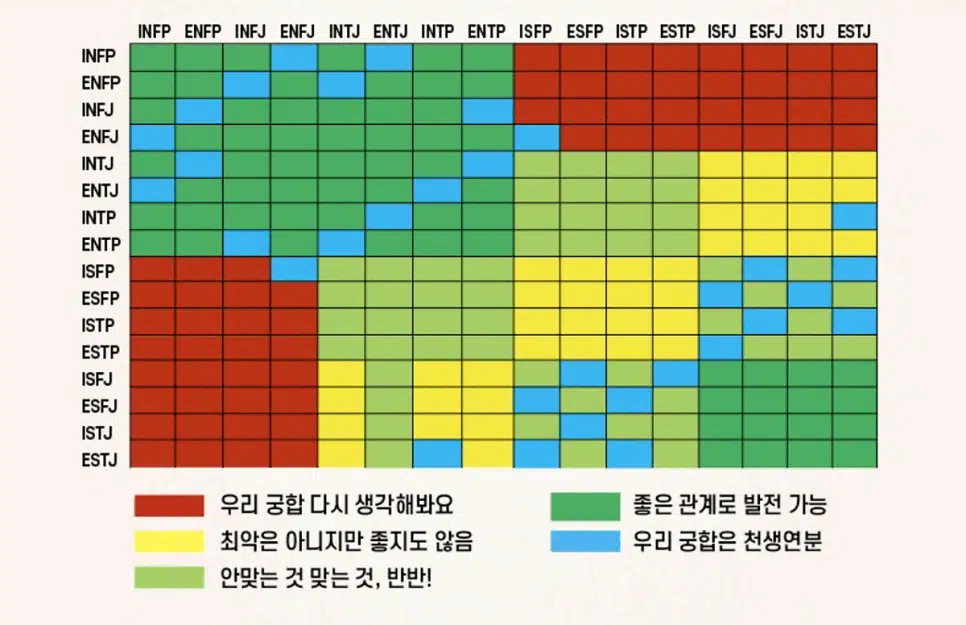

In [ ]:
df_mbti = pd.DataFrame([
    [4, 4, 4, 5, 4, 5, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1], # INFP
    [4, 4, 5, 4, 5, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1], # ENFP
    [4, 5, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1], # INFJ
    [5, 4, 4, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1], # ENFJ
    [4, 5, 4, 4, 4, 4, 4, 5, 3, 3, 3, 3, 2, 2, 2, 2], # INTJ
    [5, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2], # ENTJ
    [4, 4, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 5], # INTP
    [4, 4, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2], # ENTP
    [1, 1, 1, 5, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 4, 5], # ISFP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 4, 5, 4], # ESFP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 4, 5], # ISTP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 4, 4, 4], # ESTP
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 5, 4, 4, 4, 4], # ISFJ
    [1, 1, 1, 1, 2, 3, 2, 2, 5, 3, 5, 3, 4, 4, 4, 4], # ESFJ
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 3, 4, 4, 4, 4], # ISTJ
    [1, 1, 1, 1, 2, 3, 5, 2, 5, 3, 5, 3, 4, 4, 4, 4]  # ESTJ
    ],
    columns=['INFP', 'ENFP', 'INFJ', 'ENFJ', 'INTJ', 'ENTJ', 'INTP', 'ENTP', 'ISFP', 'ESFP', 'ISTP', 'ESTP', 'ISFJ', 'ESFJ', 'ISTJ', 'ESTJ'],
    index=['INFP', 'ENFP', 'INFJ', 'ENFJ', 'INTJ', 'ENTJ', 'INTP', 'ENTP', 'ISFP', 'ESFP', 'ISTP', 'ESTP', 'ISFJ', 'ESFJ', 'ISTJ', 'ESTJ'])

In [ ]:
df_mbti.loc["INFP","ENTP"]

4

In [ ]:
# a = 내 mbti
# b = 상대 mbti
# df_mbti.loc[a, b]

In [ ]:
a = input()
b = input()
df_mbti.loc[a.upper(),b.upper()]

istp
estj


5

In [ ]:
# text = ['너무 좋음','그냥 좋음',...]
# result = text[n-1]

# 정형 데이터: Excel, CSV, TXT
# 반정형 데이터: JSON, XML, HTML
# 비정형 데이터: 이미지, 한글(.hwp))

# 정형데이터

## 파일 포맷 형식: Excel 파일 다루기

### 엑셀 파일 불러오기

In [ ]:
# colab 환경에서 파일 업로드하기
from google.colab import files
file = files.upload()

Saving rawData_sheetplus.xlsx to rawData_sheetplus.xlsx


In [ ]:
import io
import pandas as pd

In [ ]:
# df_excel = pd.read_excel(io.BytesIO(file['rawData_sheetplus.xlsx'])) 도 가능
df_excel = pd.read_excel('rawData_sheetplus.xlsx')
df_excel

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [ ]:
df_excel.describe()

In [ ]:
df_excel.info()

### 엑셀 파일 시트별로 불러오기

In [ ]:
# 시트이름으로 가져오기
df_excel_sheet1 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name='Sheet1')  # sheet_name='시트명'
df_excel_sheet1

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [ ]:
df_excel_sheet2 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name='Sheet2')
df_excel_sheet2

,연차,연도,매출,순익,직원수
0,1,2021,4000000,1400000,10
1,2,2020,3700000,1370000,20
2,3,2019,5300000,2000000,30
3,4,2018,7000000,2400000,40
4,5,2017,8000000,3000000,50
5,6,2016,4600000,1870000,60


In [ ]:
df_excel_sheet3 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name=[0, 'Sheet2'])  # 여러개를 불러올 때 []를 사용
df_excel_sheet3

{0:    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

In [ ]:
df_excel_sheet4 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name=None)  # sheet_name=None -> 모든 시트 불러오기
df_excel_sheet4

{'Sheet1':    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

### 엑셀 파일 작성하기

In [ ]:
# df_excel에 손실 열 추가하기
df_excel['손실'] = [10000, 20000, 30000, 40000, 50000, 60000]
df_excel

,연차,연도,매출,순익,직원수,손실
0,2,2020,4000000,1400000,40,10000
1,4,2018,3700000,1370000,38,20000
2,6,2016,5300000,2000000,52,30000
3,8,2014,7000000,2400000,100,40000
4,10,2012,8000000,3000000,320,50000
5,5,2017,4600000,1870000,41,60000


### 엑셀 파일로 내보내기

In [ ]:
# .to_excel 코랩 폴더에 저장됨 / 거기서 다운받으면 된다.
df_excel.to_excel('exit.xlsx')

In [ ]:
# 엑셀 파일 내보내기 + 시트 이름
df_excel.to_excel('exit2.xlsx', sheet_name='first')

## 파일 포맷 형식: CSV 파일 다루기

In [ ]:
csv = pd.read_csv('/content/sample_data/california_housing_test.csv', sep ='')  # encoding: utf-8, cp949, euc-kr
                                                                                # sep: 구분자를 입력(","," ","\t")

In [ ]:
# csv 파일 내보내기
csv.to_csv('csv_test.csv')

## 파일 포맷 형식: TXT 파일 다루기

In [ ]:
# TXT 파일 불러오기
txt = pd.read_table('raw.txt')
txt

# txt 파일이지만 그 안에 내용을 보면 csv, tsv, ssv 인 경우가 많음

In [ ]:
# TXT 파일 내보내기
txt.to_csv('exit_txt.txt')

# 파일 형식 공통 속성
- excel, csv, txt -> 정형 데이터

In [ ]:
excel_header = pd.read_excel('rawData_sheetplus.xlsx', header=0)  # 헤더 설정하는 방법
# excel_header = pd.read_excel('rawData_sheetplus.xlsx', header=None)  헤더 설정 x
excel_header

,0,1,2,3,4
0,연차,연도,매출,순익,직원수
1,2,2020,4000000,1400000,40
2,4,2018,3700000,1370000,38
3,6,2016,5300000,2000000,52
4,8,2014,7000000,2400000,100
5,10,2012,8000000,3000000,320
6,5,2017,4600000,1870000,41


In [ ]:
# col 이름 바꾸기
excel_header = pd.read_excel('rawData_sheetplus.xlsx', names=['연차','연도','매출','순이익','직원수'])  # 열과 names의 갯수가 맞아야함
excel_header

,연차,연도,매출,순이익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [ ]:
'''
헤더를 내 값 안에서 설정하고 싶지 않을 때 -> header=None
names 새롭게 값을 할당시켜준다.
'''

## 인덱스 설정

In [ ]:
excel_index = pd.read_excel('rawData_sheetplus.xlsx', index_col='연차')
excel_index

,연도,매출,순익,직원수
연차,,,,
2,2020,4000000,1400000,40
4,2018,3700000,1370000,38
6,2016,5300000,2000000,52
8,2014,7000000,2400000,100
10,2012,8000000,3000000,320
5,2017,4600000,1870000,41


In [ ]:
excel_index = pd.read_excel('rawData_sheetplus.xlsx', index_col=None) # 인덱스 없이 불러올 때 (불러온 이후에 인덱스를 지정해주고 싶을 때)
excel_index

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


## 사용할 열만 선택

In [ ]:
# 데이터가 커서 원하는 컬럼만 불러오고 싶을 때
excel_cols = pd.read_excel('rawData_sheetplus.xlsx', usecols=['연차','매출'])
excel_cols

,연차,매출
0,2,4000000
1,4,3700000
2,6,5300000
3,8,7000000
4,10,8000000
5,5,4600000


## 제한할 행 선택

In [ ]:
# skiprows=1 -> 위에서부터 행 하나 지움 / 2 -> 2개지움
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skiprows=1, header=None)  
excel_rows

# skiprows=[2] -> 2번 인덱스를 지움
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skiprows=[2], header=None)  
excel_rows

,연차,연도,매출,순익,직원수
0,6,2016,5300000,2000000,52
1,8,2014,7000000,2400000,100
2,10,2012,8000000,3000000,320
3,5,2017,4600000,1870000,41


In [ ]:
# skipfooter=1 -> 아래서부터 행 하나 지움 / 2 -> 2개지움
excel_rows_ = pd.read_excel('rawData_sheetplus.xlsx', skipfooter=1, header=None)  
excel_rows_

# 반정형 데이터

## JSON (JavaScript Object Notation)
- {} 중괄호 사용 ex) 한 단위
{
  'name': 'data',
  'age': 1
}

In [3]:
import pandas as pd

In [12]:
shop = pd.read_json('data.json') # default: utf-8, cp949(windows 생성된 파일)
shop

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,asset/img/6/thumbnailImg.jpg,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,asset/img/7/thumbnailImg.jpg,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


In [6]:
shop2 = pd.read_json('https://test.api.weniv.co.kr/mall')  # 웹 상의 json 파일을 불러올 때
shop2

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,asset/img/6/thumbnailImg.jpg,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,asset/img/7/thumbnailImg.jpg,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


### json 파일 변경

In [13]:
# drop으로 특정 열을 삭제 shop.drop(['thumbnailImg', 'detailInfoImage'], axis=1)  행은 0 / 열은 1
shop = shop.drop('thumbnailImg', axis=1) 
shop

,id,productName,price,stockCount,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


### json 파일 내보내기

In [ ]:
shop.to_json('json_.json')

## XML 데이터
- eXtensible Markup Language
- HTML과 유사함 (HTML: 화면 구성 / XML: 데이터 전송)


```
<person>
  <name>data</name>
  <age>1</age>
</person>
```

### XML 파일 불러오기

In [14]:
xml = pd.read_xml('raw_data.xml')
xml

,category,id,year,sales,profit,employees
0,develop,2,2020,4000000,1400000,40
1,develop,4,2018,3700000,1370000,38
2,develop,6,2016,5300000,2000000,52
3,accounting,8,2014,7000000,2400000,100
4,accounting,10,2012,8000000,3000000,320
5,accounting,5,2017,4600000,1870000,41


In [ ]:
# <element></element> 요소
# <element 속성 = '값'></element>
# <element>'값'</element>

### XML 파일 저장

In [ ]:
xml.to_xml('write.xml')

## HTML

- HyperText Markup Laguage
- <태그></태그>
- 화면을 보여줄 때


```
<html>
  <head></head>
  <body></body>
  <foot></foot>
</html>
```



In [ ]:
html = pd.read_html('https://paullab.co.kr/stock.html')
html

In [18]:
html[0]

,0,1
0,시가총액,"349조 2,323억원"
1,시가총액순위,위니브월드 1위
2,상장주식수,5969782550


In [19]:
html[1]

,0,1
0,현재가,"349조 2,323억원"
1,52주 최고 l 최저,"62,800 l 42,300"
2,배당수익률 l 2019.12 ?,2.42%


In [21]:
stock = html[3]
stock.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2019.10.23,6650,20,6590,6830,6580,398421
1,2019.10.22,6630,190,6830,6930,6530,919571
2,2019.10.21,6820,390,6440,6890,6360,1678055
3,2019.10.18,6430,480,6020,6620,5970,2168857
4,2019.10.17,5950,20,6100,6180,5840,1982922


In [ ]:
stock = stock['시가']
stock

### HTML 내보내기

In [ ]:
stock.to_html('stock.html')

# 비정형 데이터

## 이미지 데이터

In [ ]:
# pillow -> 파이썬 패키지 중에서 이미지 작업을 도와주는 라이브러리

In [ ]:
!pip install Pillow

In [ ]:
!pip install matplotlib

In [ ]:
# 이미지를 인식 -> Pillow 사용
# 이미지를 출력 -> Matplotlib 사용

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

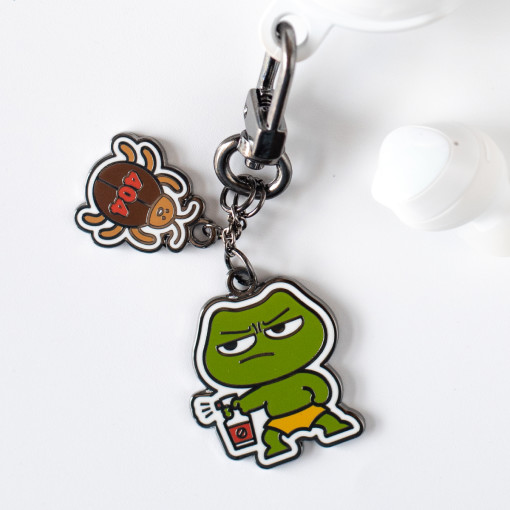

In [32]:
gary = Image.open('thumbnailImg.jpg')
gary

In [29]:
import numpy as np

In [30]:
pixel = np.array(gary)  # 이미지를 배열(uint) 형태로 바꾸기
pixel.shape

(510, 510, 3)

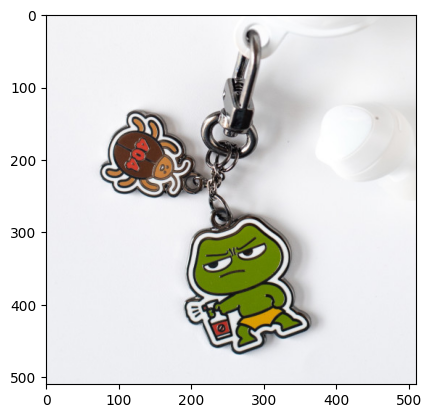

In [31]:
plt.imshow(pixel)

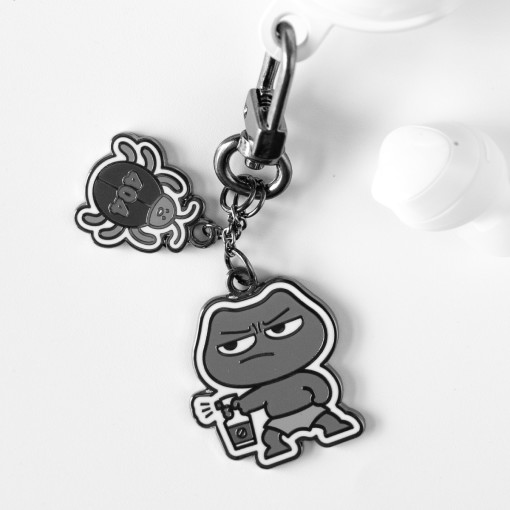

In [33]:
g = gary.convert('L')
g

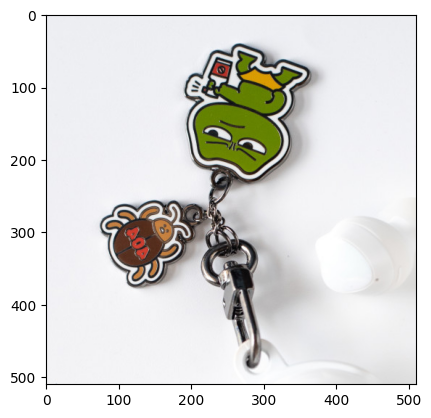

In [42]:
# 상하 반전
plt.imshow(pixel[::-1])

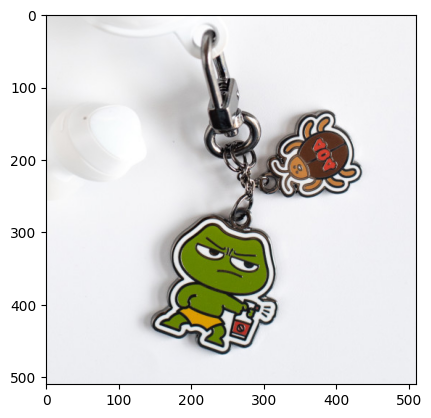

In [41]:
# 좌우 반전
plt.imshow(pixel[:,::-1])

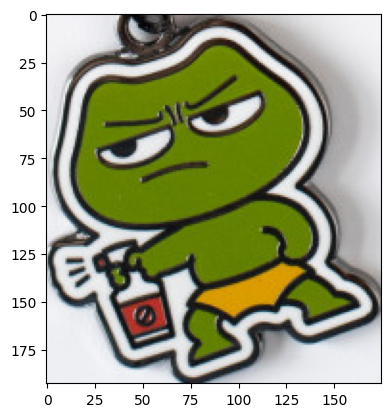

In [63]:
# 자르기
plt.imshow(pixel[275:468,190:365])  #[세로, 가로]

In [66]:
pixel2 = pixel[275:468,190:365]  #[세로, 가로]
pixel2.shape  # 3은 색상을 나타냄?

(193, 175, 3)

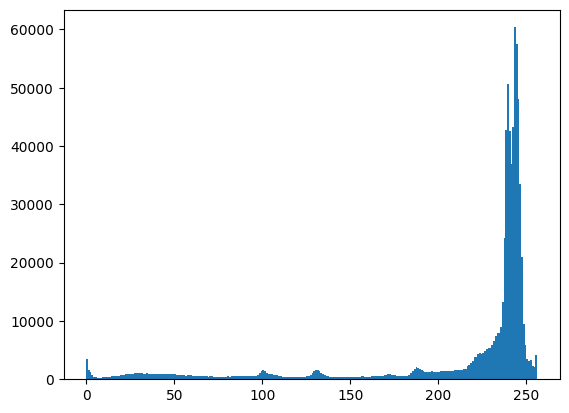

In [69]:
plt.hist(pixel.ravel(), 256, [0, 256])  # plt.hist -> 히스토그램으로 어떤 값이 많이 사용된건지 표시
plt.show()

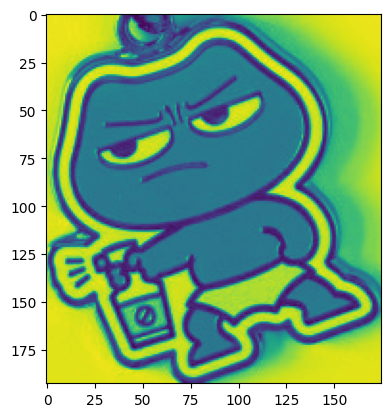

In [75]:
plt.imshow(pixel2[:,:,0])  # 가로, 세로 다 가져오고 색상값은 가져오지 않음

In [76]:
# 이미지 불러왔을 때
print(gary.filename)
print(gary.format)
print(gary.size)
print(gary.mode)
print(gary.width)
print(gary.height)

thumbnailImg.jpg
JPEG
(510, 510)
RGB
510
510


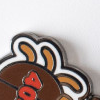

In [87]:
# Pillow로 이미지 자르기

# 이미지 변환
# coverted_gary = gary.convert("RGB")
# 민정님 코드
cropped_gary = gary.crop([100, 100, 200, 200]) # 왼쪽, 위, 오른쪽, 아래
cropped_gary.show()

In [77]:
from PIL import ImageFilter

In [ ]:
# 이미지에 필터 씌우기 (블러-blur)
blur_gary = gary.filter(ImageFilter.BLUR)
blur_gary.show()  # 이미지를 볼 때  / 배열을 볼 때 -> plt.imshow?

In [ ]:
# 이미지에 필터 씌우기 (윤곽-contour)
contour_gary = gary.filter(ImageFilter.CONTOUR)
contour_gary.show()